In [15]:
!head -n 5 transfusion.data
import pandas as pd

# Load the dataset
transfusion = pd.read_csv('transfusion.data')

# Display the first few rows
transfusion.head()


'head' is not recognized as an internal or external command,
operable program or batch file.


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


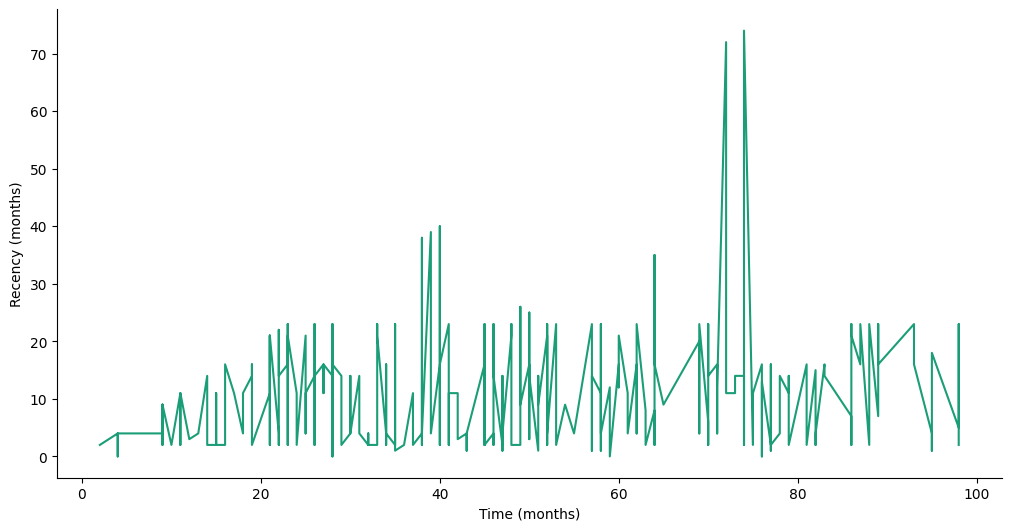

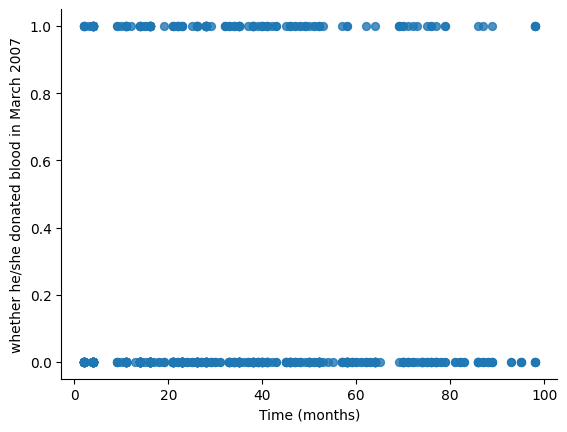

In [16]:
# @title Time (months) vs Recency (months)
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time (months)']
  ys = series['Recency (months)']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = transfusion.sort_values('Time (months)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time (months)')
_ = plt.ylabel('Recency (months)')

from matplotlib import pyplot as plt
transfusion.plot(kind='scatter', x='Time (months)', y='whether he/she donated blood in March 2007', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

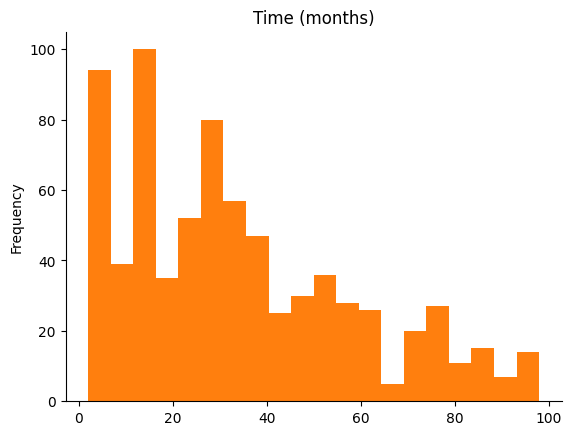

In [17]:

from matplotlib import pyplot as plt
transfusion['Time (months)'].plot(kind='hist', bins=20, title='Time (months)')
plt.gca().spines[['top', 'right',]].set_visible(False)
from matplotlib import pyplot as plt
transfusion['Time (months)'].plot(kind='hist', bins=20, title='Time (months)')
plt.gca().spines[['top', 'right',]].set_visible(False)

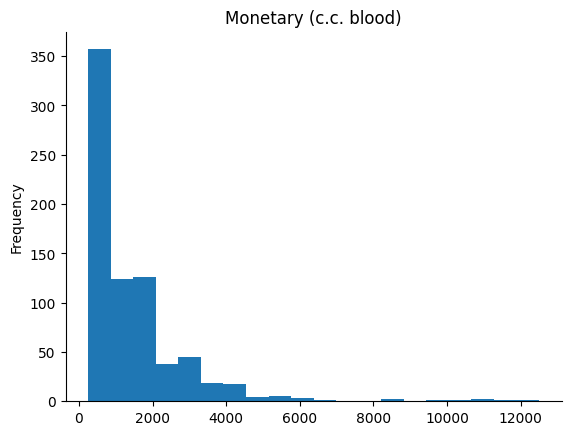

In [18]:
# @title Monetary (c.c. blood)

from matplotlib import pyplot as plt
transfusion['Monetary (c.c. blood)'].plot(kind='hist', bins=20, title='Monetary (c.c. blood)')
plt.gca().spines[['top', 'right',]].set_visible(False)




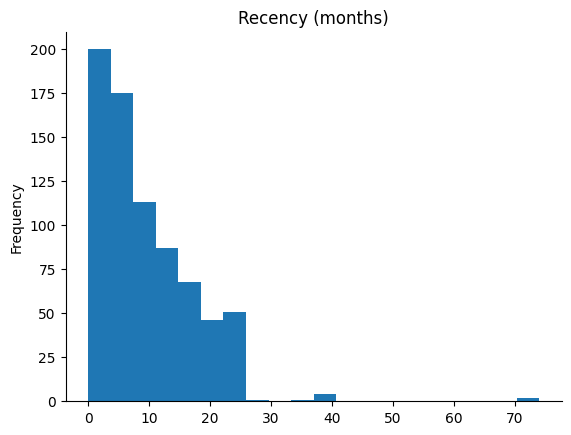

In [19]:
# @title Recency (months)

from matplotlib import pyplot as plt
transfusion['Recency (months)'].plot(kind='hist', bins=20, title='Recency (months)')
plt.gca().spines[['top', 'right',]].set_visible(False)

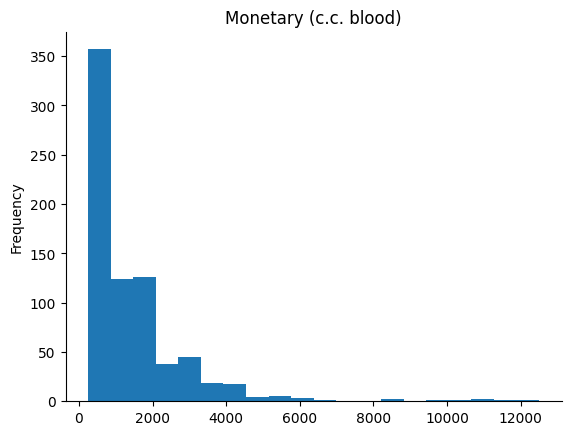

In [20]:
# @title Monetary (c.c. blood)

from matplotlib import pyplot as plt
transfusion['Monetary (c.c. blood)'].plot(kind='hist', bins=20, title='Monetary (c.c. blood)')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
import pandas as pd
from sklearn.calibration import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import numpy as np
# Load the dataset
transfusion = pd.read_csv('transfusion.data')


# Print the first 5 rows to verify the file was loaded correctly
print(transfusion.head())

# Rename the column
transfusion.rename(columns={'whether he/she donated blood in March 2007': 'target'}, inplace=True)

# Print the first 2 rows to verify the change
print(transfusion.head(2))

# Print target incidence proportions
target_proportions = transfusion['target'].value_counts(normalize=True).round(3)
print(target_proportions)

# Apply an imputer to handle missing values
imputer = SimpleImputer(strategy='most_frequent')
transfusion_imputed = pd.DataFrame(imputer.fit_transform(transfusion), columns=transfusion.columns)
label_encoders = {}
for column in transfusion_imputed.columns:
    if transfusion_imputed[column].dtype == object:
        le = LabelEncoder()
        transfusion_imputed[column] = le.fit_transform(transfusion_imputed[column])
        label_encoders[column] = le


# Split the data into train and test sets
X = transfusion.drop(columns=['target'])
y = transfusion['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Print the first 2 rows of the X_train DataFrame
print(X_train.head(2))

from tpot import TPOTClassifier
from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Create an instance of TPOTClassifier
tpot = TPOTClassifier(scoring='roc_auc', random_state=42, config_dict='TPOT light')

# Fit TPOTClassifier to the training data
tpot.fit(X_train, y_train)

# Print the AUC score of the best pipeline found by TPOT
tpot_auc_score = tpot.score(X_test, y_test)
print("TPOT AUC score:", round(tpot_auc_score, 4))

# Optionally, print the index and transformation in a loop to display the pipeline steps
for idx, transform in enumerate(tpot.fitted_pipeline_.steps):
    print(f"Step {idx + 1}: {transform}")
# Print the variance of X_train
print(X_train.var().round(3))

# Calculate the variance of each column in the training set
variance = X_train.var().round(3)

# Find the column with the highest variance
col_to_normalize = variance.idxmax()

# Copy X_train and X_test into X_train_normed and X_test_normed respectively
X_train_normed = X_train.copy()
X_test_normed = X_test.copy()
from sklearn.preprocessing import MinMaxScaler


# Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_normed)
X_test_scaled = scaler.transform(X_test_normed)
# Log normalize the column with the highest variance for both X_train and X_test
for df in [X_train_normed, X_test_normed]:
    df[col_to_normalize + '_log'] = np.log1p(df[col_to_normalize])
    df.drop(columns=[col_to_normalize], inplace=True)

# Print the variance of the columns in X_train_normed
print(X_train_normed.var().round(3))

# Import the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Create an instance of LogisticRegression
logreg = LogisticRegression()

# Train the logistic regression model using the fit() method
logreg.fit(X_train_normed, y_train)

# Predict probabilities for the test set
y_pred_proba = logreg.predict_proba(X_test_normed)[:, 1]

# Calculate the AUC score
logreg_auc_score = roc_auc_score(y_test, y_pred_proba)

# Print the AUC score
print("Logistic Regression AUC score:", round(logreg_auc_score, 4))






   Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)  \
0                 2                 50                  12500             98   
1                 0                 13                   3250             28   
2                 1                 16                   4000             35   
3                 2                 20                   5000             45   
4                 1                 24                   6000             77   

   whether he/she donated blood in March 2007  
0                                           1  
1                                           1  
2                                           1  
3                                           1  
4                                           0  
   Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)  \
0                 2                 50                  12500             98   
1                 0                 13                   3250          

In [2]:
from operator import itemgetter

# Assuming you have a list of (model_name, model_score) pairs
model_scores = [
    ('Logistic Regression', logreg_auc_score),
    # Add other models and their AUC scores here
    # ('Model Name', model_auc_score),
]

# Sort the models based on their AUC score from highest to lowest
sorted_model_scores = sorted(model_scores, key=itemgetter(1), reverse=True)

# Print the sorted list of models and their AUC scores
for model_name, model_score in sorted_model_scores:
    print(f"{model_name}: {model_score:.4f}")

Logistic Regression: 0.7787


NameError: name 'X_train_normed' is not defined

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train the linear regression model
linreg = LinearRegression()
linreg.fit(X_train_normed, y_train)

# Predict on the test set
y_pred = linreg.predict(X_test_normed)

# Evaluate the linear regression model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression MSE:", round(mse, 4))
print("Linear Regression MAE:", round(mae, 4))
print("Linear Regression R^2 Score:", round(r2, 4))

# Calculate accuracy within a tolerance range (e.g., within 0.1 of the actual value)
tolerance = 0.1
accuracy_within_tolerance = sum(abs(y_test - y_pred) < tolerance) / len(y_test)
print("Linear Regression Accuracy within tolerance of 0.1:", round(accuracy_within_tolerance, 4))



Linear Regression MSE: 0.155
Linear Regression MAE: 0.3239
Linear Regression R^2 Score: 0.1501
Linear Regression Accuracy within tolerance of 0.1: 0.1467


In [5]:
transfusion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Recency (months)       748 non-null    int64
 1   Frequency (times)      748 non-null    int64
 2   Monetary (c.c. blood)  748 non-null    int64
 3   Time (months)          748 non-null    int64
 4   target                 748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB
